## Importing dataset and exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas 
import seaborn as sns

In [2]:
data = pandas.read_csv('Volkswagen price.csv')                 # Improting data set

In [3]:
data.shape # Getting data shape 

(15157, 9)

## The objective is to predict the price of Volkswagen cars and build regression models with high accuracy

In [4]:
data.head() # Getting overview of actual data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


### MPG, or miles per gallon, is the distance, measured in miles, that a car can travel per gallon(1 gallon=3.78 litre) of fuel. MPG is also the primary measurement of a car's fuel efficiency: The higher a car's MPG, the more fuel efficient it is.

### Engine Size is in cubic inches in US

In [6]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
data.describe() # Measure of Central tendency

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


## Exploratory data analysis

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='count'>

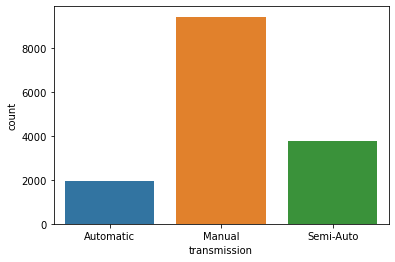

In [8]:
sns.countplot(data["transmission"])

### This chart shows that there are most of the cars with manual transmission then semi auto and less automatic cars in the dataset.

<AxesSubplot:xlabel='count', ylabel='model'>

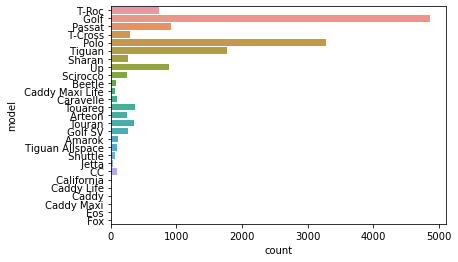

In [9]:
sns.countplot(y = data["model"])                                # Creating bar chart of Car models

### There are top 3 cars are Golf, Polo and Tiguan in the dataset constitute most of all the VW cars with all other cars contribution. 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='count'>

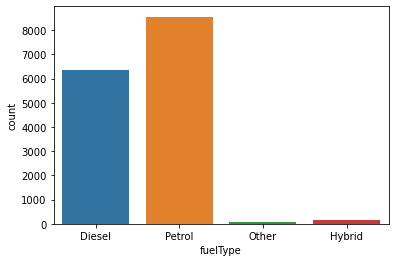

In [10]:
sns.countplot(data["fuelType"])

<AxesSubplot:xlabel='year', ylabel='price'>

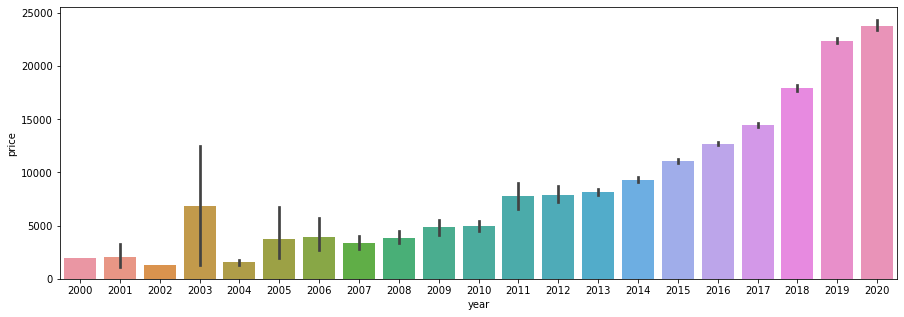

In [11]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = data["year"], y = data["price"])

### It shows that the recently manufactured cars (year = 2018, 2019 & 2020) are sold for more than average price as compared to the cars that are manufactured earlier.

In [12]:
data["age"] = 2020 - data["year"] # Getting age of cars
data = data.drop(columns = ["year"]) # removing year column
data.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
5615,Passat,19998,Semi-Auto,22850,Hybrid,0,166.0,1.4,3
2052,Golf,13552,Manual,22527,Petrol,30,53.3,1.4,3
6314,Passat,18750,Automatic,13535,Petrol,145,44.8,2.0,2
193,T-Roc,17250,Manual,7942,Petrol,150,55.4,1.0,2
2294,Golf,22105,Semi-Auto,4924,Petrol,145,43.5,1.5,1
14638,Golf SV,9500,Manual,41500,Diesel,0,72.4,1.6,5
9013,Polo,11649,Manual,12677,Petrol,145,48.7,1.0,1
8571,Polo,14990,Manual,1950,Petrol,145,48.7,1.0,0
1637,Golf,16995,Semi-Auto,14925,Petrol,145,45.6,1.0,1
2059,Golf,19054,Semi-Auto,10697,Petrol,145,44.1,1.5,1


## Pre-processing for modeling

### We are use pd.get_dummies option to get the one hot encoded variables for the categorical variables. The column names are preserved

In [13]:
data_expanded = pandas.get_dummies(data)
data_expanded.head()

,price,mileage,tax,mpg,engineSize,age,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [14]:
Y = data_expanded['price']

In [15]:
X = data_expanded.drop(columns=['price'])

In [16]:
X.head()

,mileage,tax,mpg,engineSize,age,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,13904,145,49.6,2.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,4562,145,49.6,2.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,7414,145,50.4,2.0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,4825,145,32.5,2.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,6500,150,39.8,1.5,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# Model 1

### We are simply building logistic regression model by 75 % training data set.

In [17]:
from sklearn.model_selection import train_test_split  # Importing train test split function for data splitting

In [18]:
x_train,x_test, y_train, y_test = train_test_split(X,Y, random_state=1) # data splitting into train and test set

In [19]:
from sklearn.linear_model import LinearRegression # Importing linear Regression model
regressor1 = LinearRegression() # Creating instance for model with regressor object
regressor1.fit(x_train, y_train) # Fitting data set with the Multiple regression model.

LinearRegression()

In [20]:
y_pred1 = regressor1.predict(x_test) # Predicting the x test set

## Evaluating the Model Performance

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.8911003906184695

### The R-Squared of the model 1 is 89.11 %

### R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).
The higher the value of R square shows the best model

# Model 2

### Applying the standard scalar option to standardize all the variables in the dataset.

In [22]:
Y = data_expanded['price'] # Defining dependent variable

In [23]:
X2 = data_expanded.drop(columns=['price']) # Defining independent variables

In [24]:
x_train,x_test, y_train, y_test = train_test_split(X2,Y, random_state=1) # data splitting into train and test set

In [25]:
from sklearn.preprocessing import StandardScaler # Importing standard scaler function
sc=StandardScaler() # Creating instance
x_train=sc.fit_transform(x_train) # Applying feature scaling
x_test=sc.transform(x_test) 

### The entire data is normalised with StandardScaler() function which normalised data in the range of -3 to +3.

In [26]:
from sklearn.linear_model import LinearRegression # Importing linear Regression model
regressor2 = LinearRegression()  # Creating instance for model with regressor object
regressor2.fit(x_train, y_train) # Fitting data set with the Multiple regression model.

LinearRegression()

In [27]:
y_pred2 = regressor2.predict(x_test) # Predicting the x test set

## Evaluating the Model Performance

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.8910972470745782

### The R-Squared of the model 2 is 89.10 %

## Model 3

### Selection of feature on the basis of correlation coefficient

In [29]:
import matplotlib.pyplot as plt # Importing plotting library
import seaborn as sns
sns.set_style('darkgrid') # Setting dark grid line for the chart

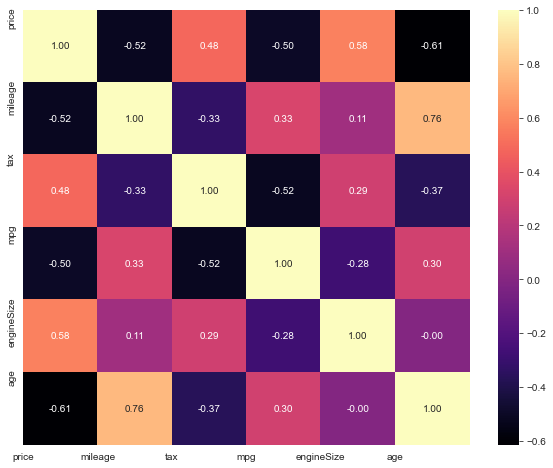

In [30]:
corr = data.corr() # Creating correlation matrix
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [31]:
X3= data_expanded.drop(columns=['price','age']) # Removing age column from dataset.

In [32]:
X3.head() # The top five entries of independent variables

,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,13904,145,49.6,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,4562,145,49.6,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,7414,145,50.4,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,4825,145,32.5,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,6500,150,39.8,1.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [33]:
Y = data_expanded['price'] # Defining dependent variable

In [34]:
x_train,x_test, y_train, y_test = train_test_split(X3,Y, random_state=1) # data splitting into train and test set

In [35]:
from sklearn.linear_model import LinearRegression # Importing linear Regression 
regressor3 = LinearRegression()  # Creating instance for model with regressor object
regressor3.fit(x_train, y_train) # Fitting data set with the Multiple regression model

LinearRegression()

In [36]:
y_pred3 = regressor3.predict(x_test) # Predicting the x test set

## Evaluating the Model Performance

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

0.8506670373722147

### The R-Squared of the model 3 is 85.06 %

### It can been that the age feature has negative relation with price feature so we remove age feature then rebuild model to observe the model performance but the model performance is getting down here. So its advised not to remove age feature.

# Model 4

### We are building Random Forest Regression model

In [38]:
X4= data_expanded.drop(columns=['price']) # Defining independent variable

In [39]:
Y = data_expanded['price'] # Defining dependent variable

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X4, Y, random_state = 0)

In [41]:
from sklearn.ensemble import RandomForestRegressor # Importing the Random Forest model
regressor4 = RandomForestRegressor(n_estimators = 10, random_state = 0)  # Creating instance for the model
regressor4.fit(x_train, y_train) # Fitting the model on training data

RandomForestRegressor(n_estimators=10, random_state=0)

In [42]:
y_pred4 = regressor4.predict(x_test) # Predicting the x test set

## Evaluating the Model Performance

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4)

0.9455379212358833

### The R-Squared of the model 4 is 94.55 %

# Model 5

### We are building SV Regression model

In [44]:
X5= data_expanded.drop(columns=['price']) # Defining independent variable

In [45]:
Y = data_expanded['price'] # Defining dependent variable

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X5, Y, random_state = 0)

In [47]:
from sklearn.svm import SVR # Importing the SVR model
regressor5 = SVR(kernel = 'rbf') # Creating instance for the model
regressor5.fit(x_train, y_train) # Fitting the model on training data

SVR()

In [48]:
y_pred5 = regressor5.predict(x_test) # Predicting the x test set

## Evaluating the Model Performance

In [49]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred5)

0.10160390057843993

### The R-Squared of the model 5 is 10.16 %

### R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

## Conclusion: 
## There are five models for the car price data and we build different regression model for different situations.
## The performance of the models are give as:
## The R-Squared of the model 1 is 89.11%.
## The R-Squared of the model 2 is 89.10%
## The R-Squared of the model 3 is 85.06%
## The R-Squared of the model 4 is 94.55%
## The R-Squared of the model 5 is 10.16%

## The criteria is that a higher r-squared indicates a better fit for the model.

## Model 4 is best on the basis of high R - Sqaured score for the  Random Forest Regression model.

## Prediction of x test with Random Forest Regression (Model 4)

In [50]:
y_pred4 = regressor4.predict(x_test)
print(list(y_pred4))

[23149.833333333336, 18317.5, 9225.4, 21693.5, 16111.9, 14045.0, 20363.8, 12750.5, 15367.4, 29010.433333333338, 10160.0, 11368.0, 14775.4, 26336.8, 18022.9, 20152.5, 25125.4, 4025.3, 25719.0, 5474.4, 14234.8, 20968.0, 17883.7, 14061.6, 9869.4, 34215.2, 9095.0, 14956.7, 31638.3, 8647.6, 22477.0, 12390.0, 7754.2, 11607.5, 18243.2, 10529.7, 19990.1, 8040.4, 23468.0, 12634.2, 26740.0, 15378.8, 18638.1, 8721.8, 10566.3, 25690.0, 11623.1, 29184.1, 20510.6, 9480.2, 9932.1, 9562.0, 14125.6, 31839.5, 15575.9, 15615.1, 18167.9, 9443.1, 15247.5, 17075.3, 27455.8, 15131.1, 6232.3, 18867.8, 26858.8, 21490.5, 18143.9, 19200.7, 25381.0, 23670.2, 8263.5, 20155.75, 25124.7, 14354.6, 19339.1, 11125.0, 10338.8, 9123.4, 9442.6, 13191.6, 17632.5, 19264.0, 25140.6, 12183.8, 10302.9, 21049.5, 23460.8, 9090.1, 42346.0, 7266.0, 14319.9, 8682.0, 9100.0, 9997.0, 21872.5, 24691.8, 13783.3, 20998.0, 19193.4, 11582.9, 23520.0, 27963.6, 28994.8, 9981.8, 22119.8, 17266.5, 10205.9, 4245.0, 8208.3, 31702.0, 13609.3, 18

In [51]:
print(list(y_test))

[23500, 19990, 10395, 19995, 16298, 14490, 19795, 12681, 12495, 27990, 9495, 10998, 16290, 27500, 17495, 22061, 25990, 3195, 23990, 4998, 16995, 18500, 17217, 13497, 10000, 38990, 10991, 14498, 26994, 9490, 16991, 12498, 7990, 10491, 16990, 11000, 24999, 7495, 28995, 12791, 33489, 14980, 19290, 8995, 9990, 28490, 11500, 29995, 19298, 8995, 10990, 10800, 14795, 33785, 15000, 13290, 19152, 9450, 15950, 16093, 35500, 13998, 4995, 18199, 25200, 20990, 18999, 18990, 26000, 24995, 8000, 17950, 22999, 14499, 18769, 10891, 9727, 8971, 9291, 13000, 14990, 18781, 25386, 12990, 11995, 19485, 19889, 9489, 45490, 7100, 14689, 9250, 9550, 9699, 22995, 21990, 13441, 20998, 20990, 10495, 22500, 27990, 29250, 10400, 22999, 16490, 9449, 2750, 7498, 32995, 11490, 14490, 9881, 11490, 17295, 28990, 9690, 33999, 23990, 20000, 19522, 25995, 29990, 10790, 35995, 27995, 10990, 17498, 19950, 31750, 22490, 10000, 19086, 18500, 18191, 19499, 10999, 13298, 36995, 5499, 6999, 13334, 26791, 12090, 13199, 23485, 2049

### It can be seen that the actual price of the car is similar to the predicted price of the car.